In [1]:
# !pip3 install --upgrade pip
# !pip3 install tensorflow matplotlib numpy

In [2]:
import tensorflow as tf
import numpy as np
import os, time
import matplotlib.pyplot as plt
from datetime import datetime
from packaging import version
%matplotlib inline
# Load the TensorBoard notebook extension.
%load_ext tensorboard

import publicMethod

Import publicMethod


In [3]:
# tf.keras.optimizers.Optimizer?
# tf.keras.optimizers.SGD?
# tf.keras.optimizers.Adam?
# tf.saved_model.save?
# tf.saved_model.load?

print("TensorFlow version: ", tf.__version__, "\nDevice avaliable now:",tf.config.get_visible_devices())
assert version.parse(tf.__version__).release[0] >= 2, \
"This notebook requires TensorFlow 2.0 or above."

TensorFlow version:  2.4.1 
Device avaliable now: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [5]:
LOAD_PATH = "./npy/"
SITE_CODE = "722860"
PROJECT_PATH = "tf_model_compare_params"
time = datetime.now().strftime("""%Y%m%d-%H%M%S""")
SAVE_PATH = f"{PROJECT_PATH}/tf_model_params_combine_{SITE_CODE}_{time}"
logdir = f"{SAVE_PATH}/logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

try:
    print(PROJECT_PATH)
    os.mkdir(PROJECT_PATH)
except: pass
try:
    print(SAVE_PATH)
    os.mkdir(SAVE_PATH)
except: pass
try:
    print(SAVE_PATH+"/fig")
    os.mkdir(SAVE_PATH+"/fig")
except: pass

paths = []
for dirname, _, filenames in os.walk(LOAD_PATH):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
print(paths)

tf_model_compare_params
tf_model_compare_params/tf_model_params_combine_722860_20210805-000104
tf_model_compare_params/tf_model_params_combine_722860_20210805-000104/fig
['./npy/avg_b_722860.npy', './npy/.DS_Store', './npy/max_722860.npy', './npy/min_745700.npy', './npy/eemd_min_722860.npy', './npy/avg_722860.npy', './npy/eemd_avg_722860.npy', './npy/min_722860.npy', './npy/max_745700.npy', './npy/eemd_max_722860.npy', './npy/.npy', './npy/imfs_722860.npy', './npy/avg_a_583620.npy', './npy/avg_745700.npy']


In [6]:
def construct_model(train_data, train_label, test_data, test_label):
    #strategy = tf.distribute.MirroredStrategy()
    #with strategy.scope():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(21,)),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(lr = 1e-6),
                  loss='mse')
    # model.summary()
    
    with open(f"{SAVE_PATH}/model_summary.txt", "w") as f:
        f.write("""tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(21,)),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64),
        tf.keras.layers.Dense(1)
    ])
        model.compile(optimizer=tf.keras.optimizers.SGD(lr = 1e-6),
                  loss='mse')""")

    model.fit(train_data, train_label, epochs=200, callbacks=[tensorboard_callback], validation_data=(test_data, test_label), verbose=0)

    model.evaluate(test_data, test_label)
    
    return model

In [7]:
def retrain(model, train_data, train_label, test_data, test_label):
    model.fit(train_data, train_label, epochs=25, callbacks=[tensorboard_callback], validation_data=(test_data, test_label), verbose = 0)
    return model

In [8]:
def plot(model_predict, test_label, predict_train, train_label, i, name):
    global SITE_CODE, PROJECT_PATH
    fig, axes = plt.subplots(4, 1)
    error = model_predict.T[0] - test_label
    axes[0].plot((-error))
    axes[1].plot(test_label, "r")
    axes[1].plot(model_predict, "g")
    
    error = predict_train.T[0] - train_label
    axes[2].plot((-error))
    axes[3].plot(train_label, "r")
    axes[3].plot(predict_train, "g")
    plt.xlabel(f"data {name} imf {i} from %s"%SITE_CODE)
    plt.ylabel("Temperature/F")
    plt.gcf().set_size_inches(14, 20)
    plt.savefig(f"./{SAVE_PATH}/fig/Error_{name}_imf{i}_%s.jpg"%SITE_CODE)
    plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6

Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 2.2537 - val_loss: 1.9828
Epoch 70/200
707/707 [==============================] - 2s 3ms/step - loss: 2.2176 - val_loss: 1.9814
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 2.2511 - val_loss: 1.9800
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 2.2172 - val_loss: 1.9786
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 2.2306 - val_loss: 1.9773
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 2.2081 - val_loss: 1.9759
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 2.1742 - val_loss: 1.9746
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 2.1850 - val_loss: 1.9734
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 2.1845 - val_loss: 1.9722
Epoch 78/200
707/707 [==============================] - 1s 2ms/step - loss: 2.2435

Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0844 - val_loss: 1.9193
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 2.1046 - val_loss: 1.9189
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 2.1049 - val_loss: 1.9185
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0752 - val_loss: 1.9181
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0460 - val_loss: 1.9177
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0954 - val_loss: 1.9173
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0676 - val_loss: 1.9169
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0843 - val_loss: 1.9165
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - loss: 2.0818 - val_loss: 1.9161
Epoch 158/200
707/707 [==============================] - 1s 2ms/step - lo

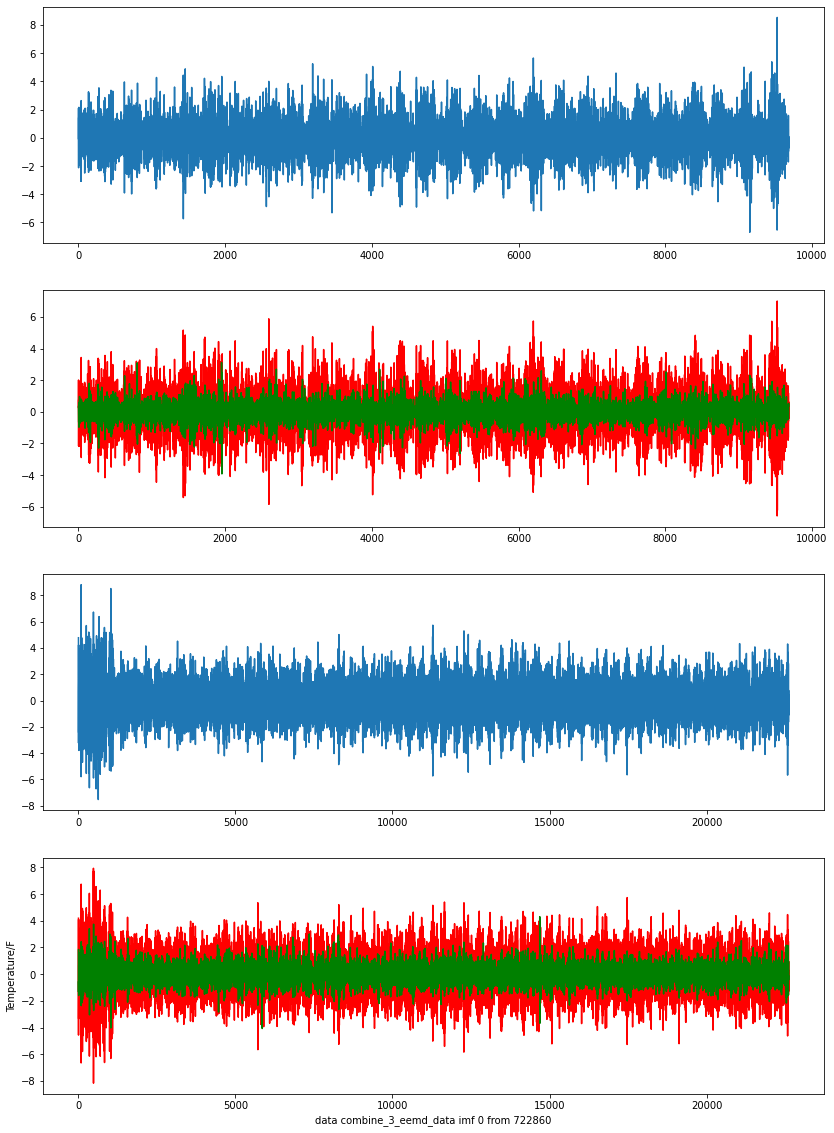

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.0841 - val_loss: 0.0794
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0851 - val_loss: 0.0792
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0837 - val_loss: 0.0790
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0826 - val_loss: 0.0789
Epoch 72/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0815 - val_loss: 0.0787
Epoch 73/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0798 - val_loss: 0.0785
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0805 - val_loss: 0.0784
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0813 - val_loss: 0.0782
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0825 - val_loss: 0.0780
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0799 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0721 - val_loss: 0.0691
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0706 - val_loss: 0.0690
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0711 - val_loss: 0.0689
Epoch 151/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0718 - val_loss: 0.0688
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0731 - val_loss: 0.0687
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0724 - val_loss: 0.0686
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0717 - val_loss: 0.0685
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0720 - val_loss: 0.0684
Epoch 156/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0715 - val_loss: 0.0684
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

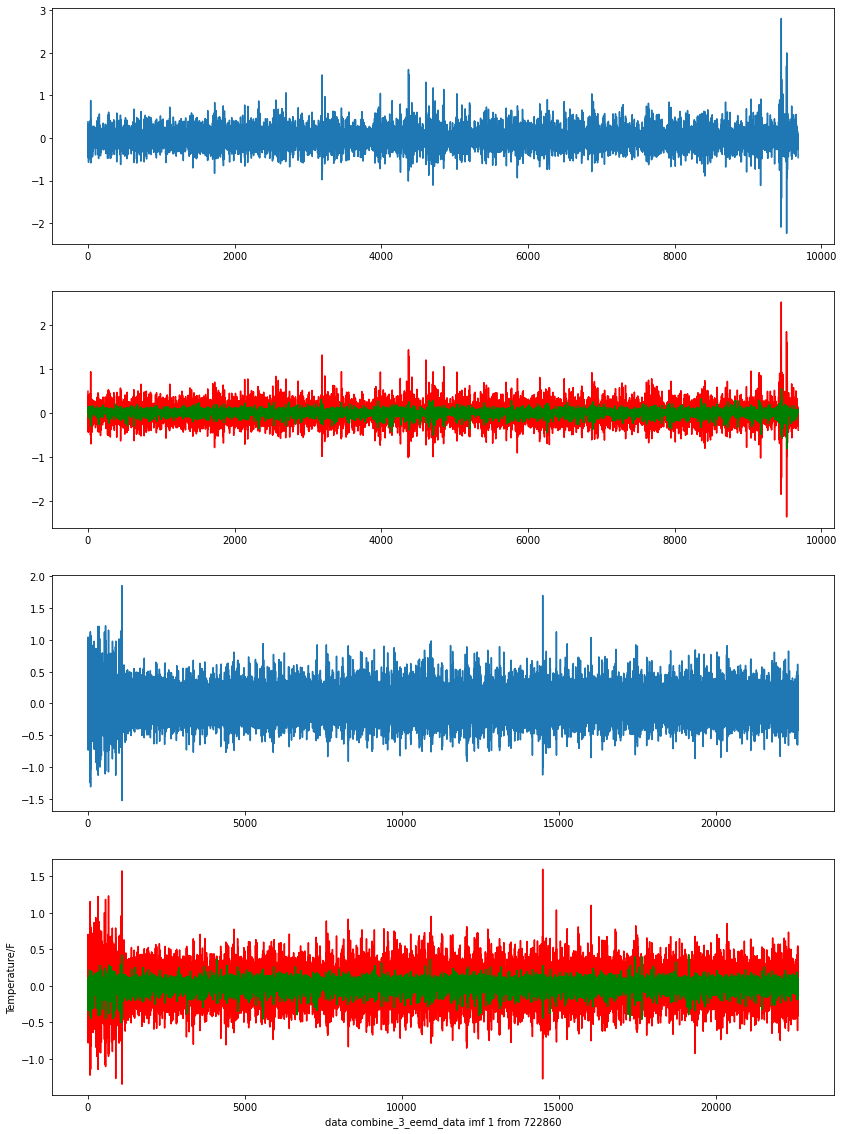

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.8765 - val_loss: 0.7551
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8948 - val_loss: 0.7509
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8700 - val_loss: 0.7469
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8539 - val_loss: 0.7430
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8570 - val_loss: 0.7392
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8747 - val_loss: 0.7353
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8579 - val_loss: 0.7318
Epoch 75/200
707/707 [==============================] - 2s 2ms/step - loss: 0.8661 - val_loss: 0.7282
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8423 - val_loss: 0.7247
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.8268 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7011 - val_loss: 0.5844
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7097 - val_loss: 0.5833
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7183 - val_loss: 0.5823
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6948 - val_loss: 0.5813
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6967 - val_loss: 0.5803
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7015 - val_loss: 0.5793
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7122 - val_loss: 0.5784
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7145 - val_loss: 0.5774
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.6868 - val_loss: 0.5765
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

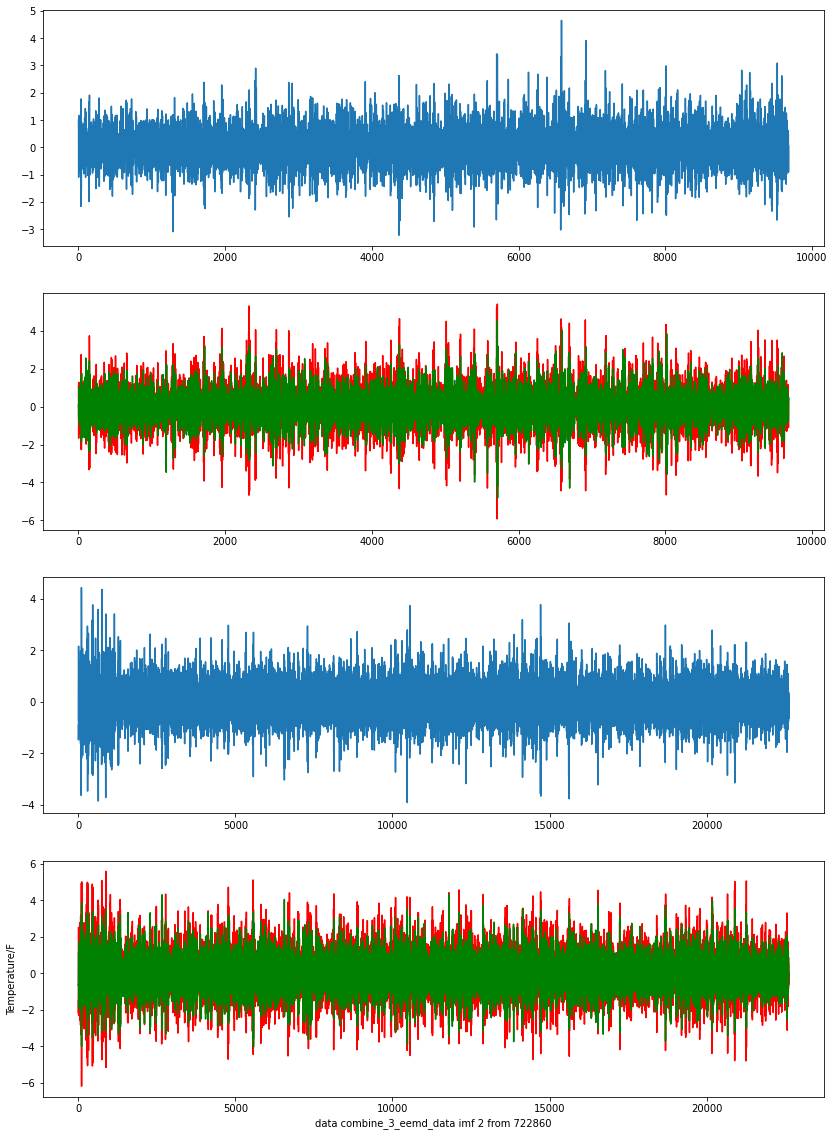

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 1.4172 - val_loss: 0.9455
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3883 - val_loss: 0.9408
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3761 - val_loss: 0.9361
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3850 - val_loss: 0.9304
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 1.4049 - val_loss: 0.9259
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3494 - val_loss: 0.9207
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3659 - val_loss: 0.9163
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3400 - val_loss: 0.9111
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 1.3314 - val_loss: 0.9063
Epoch 77/200
707/707 [==============================] - 2s 2ms/step - loss: 1.3374 - val_loss: 

707/707 [==============================] - 1s 2ms/step - loss: 1.0037 - val_loss: 0.6803
Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9781 - val_loss: 0.6782
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9892 - val_loss: 0.6762
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 1.0028 - val_loss: 0.6743
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9881 - val_loss: 0.6725
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9768 - val_loss: 0.6705
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9836 - val_loss: 0.6682
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9682 - val_loss: 0.6659
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9785 - val_loss: 0.6640
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.9812 - v

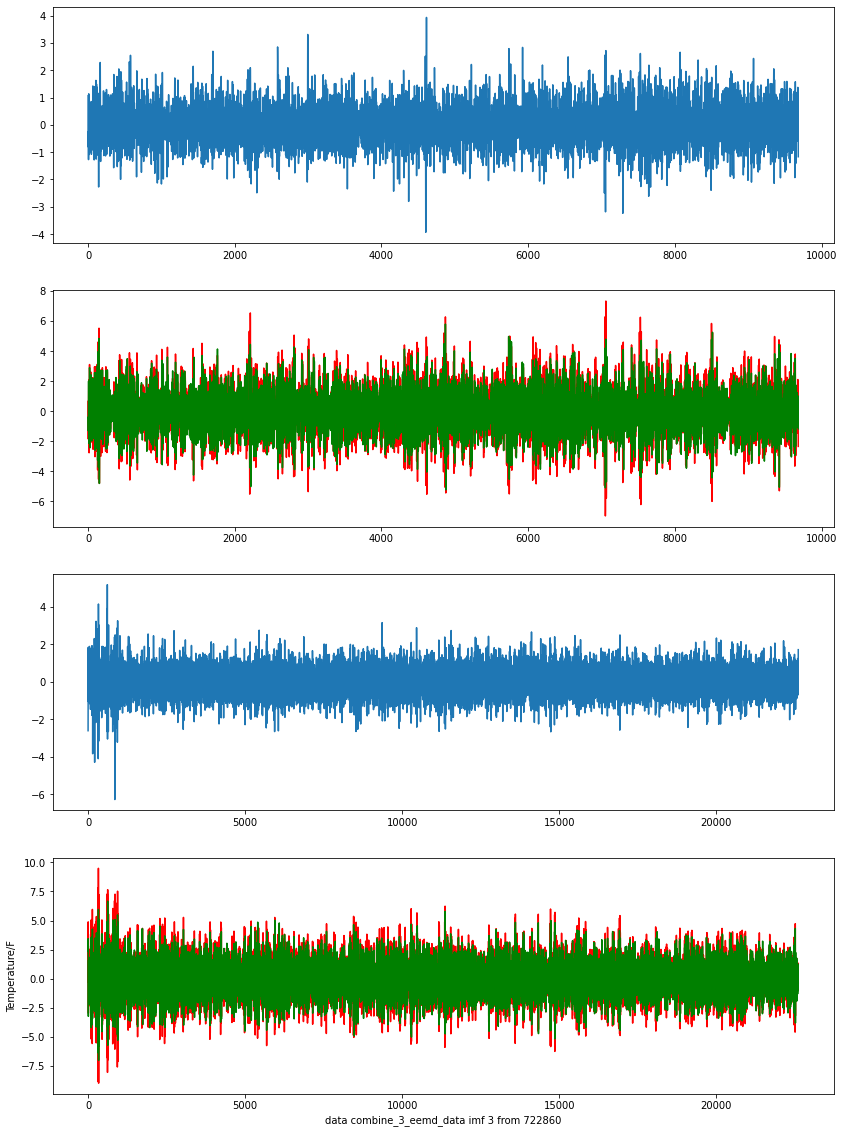

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.7435 - val_loss: 0.3394
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7154 - val_loss: 0.3377
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7136 - val_loss: 0.3358
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7146 - val_loss: 0.3339
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7195 - val_loss: 0.3322
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7279 - val_loss: 0.3303
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7527 - val_loss: 0.3287
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7022 - val_loss: 0.3273
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7154 - val_loss: 0.3254
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7233 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.5451 - val_loss: 0.2441
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.5461 - val_loss: 0.2434
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.5519 - val_loss: 0.2426
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.5528 - val_loss: 0.2421
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.5383 - val_loss: 0.2414
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.5311 - val_loss: 0.2406
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.5286 - val_loss: 0.2401
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.5368 - val_loss: 0.2393
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.5251 - val_loss: 0.2385
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

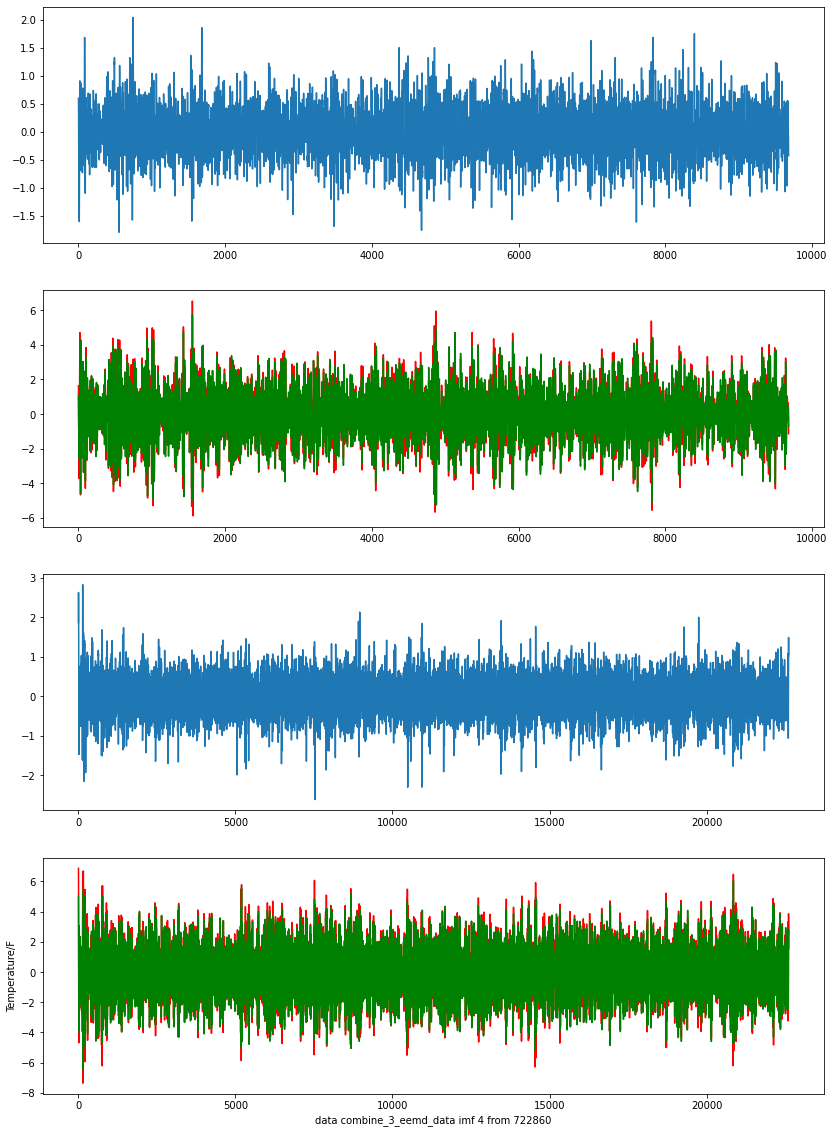

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.4501 - val_loss: 0.2053
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4485 - val_loss: 0.2041 - ETA: 0s - loss: 0.448
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4452 - val_loss: 0.2030
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4413 - val_loss: 0.2018
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4322 - val_loss: 0.2006
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4289 - val_loss: 0.1994
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4357 - val_loss: 0.1983
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4325 - val_loss: 0.1972
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4494 - val_loss: 0.1960
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - l

707/707 [==============================] - 1s 2ms/step - loss: 0.3249 - val_loss: 0.1438
Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3382 - val_loss: 0.1433
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3292 - val_loss: 0.1428
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3300 - val_loss: 0.1423
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3341 - val_loss: 0.1418
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3197 - val_loss: 0.1413
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3221 - val_loss: 0.1409
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3306 - val_loss: 0.1404
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3270 - val_loss: 0.1399
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3177 - v

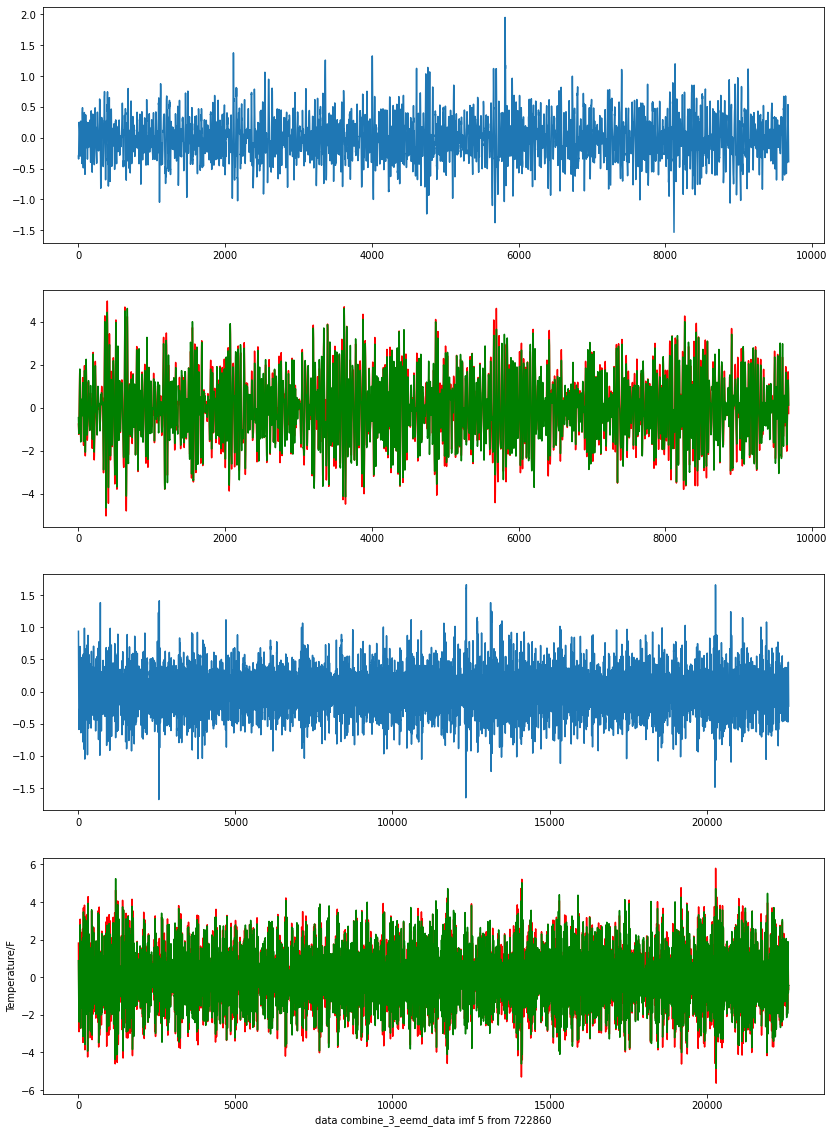

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.4393 - val_loss: 0.1777
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4290 - val_loss: 0.1744
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4266 - val_loss: 0.1715
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4108 - val_loss: 0.1686
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4248 - val_loss: 0.1655
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4055 - val_loss: 0.1627
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3950 - val_loss: 0.1603
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4012 - val_loss: 0.1578
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3897 - val_loss: 0.1552
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3953 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2553 - val_loss: 0.0724
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2542 - val_loss: 0.0719
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2498 - val_loss: 0.0713
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2432 - val_loss: 0.0709
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2443 - val_loss: 0.0706
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2491 - val_loss: 0.0701
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2474 - val_loss: 0.0696
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2458 - val_loss: 0.0692
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2412 - val_loss: 0.0687
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

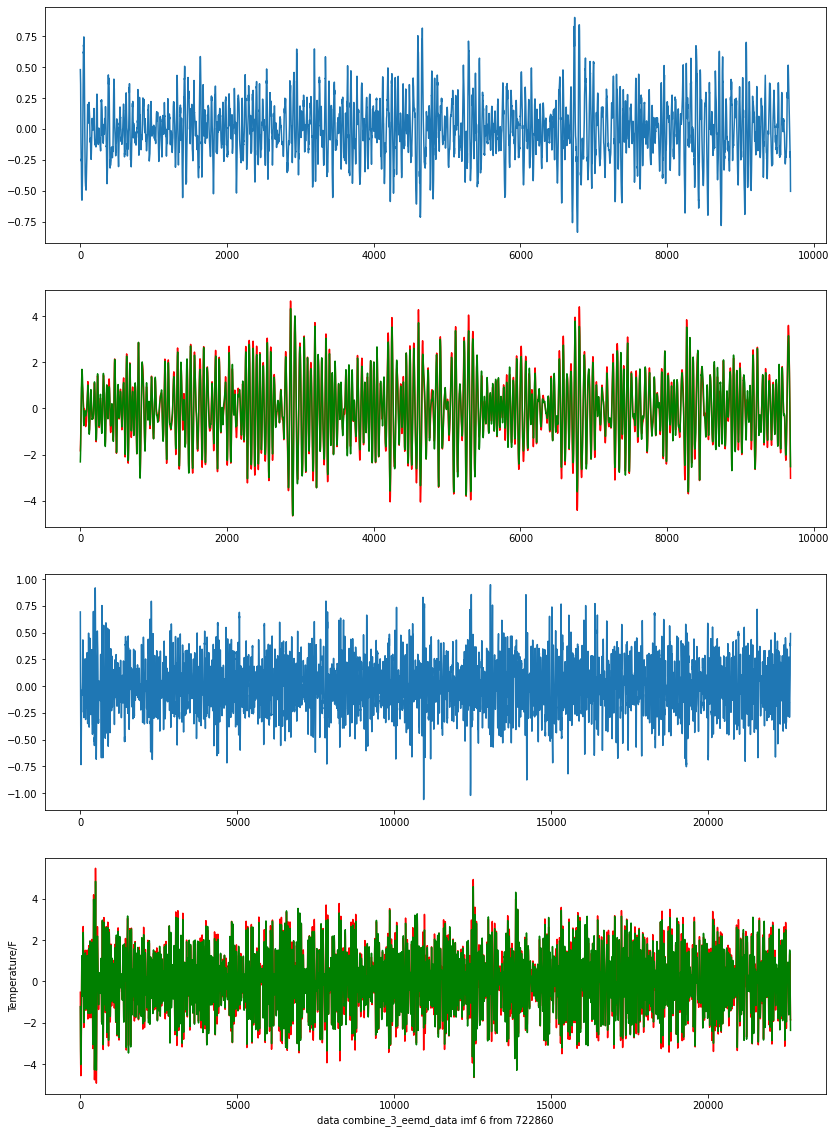

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 2s 2ms/step - loss: 0.2903 - val_loss: 0.2031
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2982 - val_loss: 0.2018
Epoch 70/200
707/707 [==============================] - 2s 2ms/step - loss: 0.3066 - val_loss: 0.2005
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2901 - val_loss: 0.1992
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3035 - val_loss: 0.1979
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2955 - val_loss: 0.1968
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2894 - val_loss: 0.1956
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2927 - val_loss: 0.1944
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2934 - val_loss: 0.1931
Epoch 77/200
707/707 [==============================] - 2s 2ms/step - loss: 0.2852 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2186 - val_loss: 0.1274
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2182 - val_loss: 0.1267
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2204 - val_loss: 0.1261
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2150 - val_loss: 0.1253
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2129 - val_loss: 0.1247
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2142 - val_loss: 0.1241
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2083 - val_loss: 0.1234
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2189 - val_loss: 0.1227
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2121 - val_loss: 0.1221
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

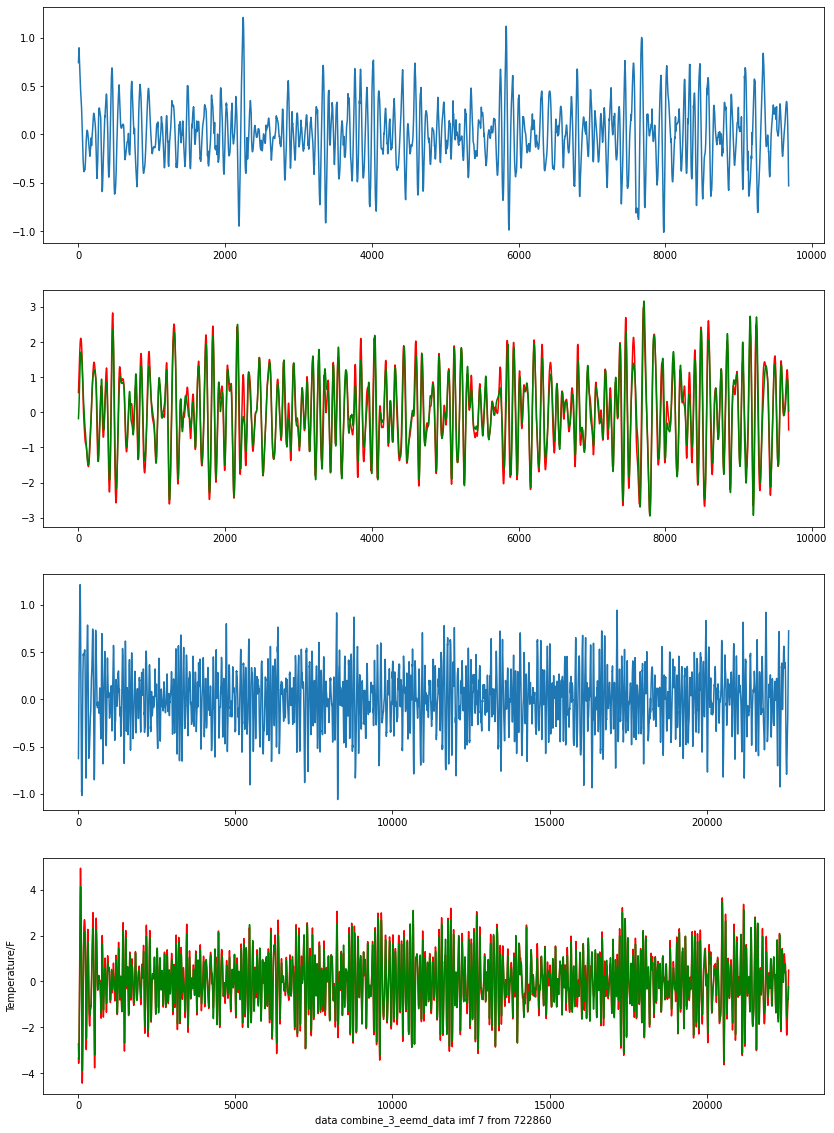

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.7715 - val_loss: 0.2285
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7674 - val_loss: 0.2266
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7780 - val_loss: 0.2237
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7577 - val_loss: 0.2221
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7582 - val_loss: 0.2200
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7404 - val_loss: 0.2175
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7450 - val_loss: 0.2146
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7254 - val_loss: 0.2127
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7215 - val_loss: 0.2125
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.7213 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4166 - val_loss: 0.1015
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4110 - val_loss: 0.1004
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4055 - val_loss: 0.0994
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4145 - val_loss: 0.0985
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4127 - val_loss: 0.0976
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3978 - val_loss: 0.0968
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3981 - val_loss: 0.0957
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.4021 - val_loss: 0.0951
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.3926 - val_loss: 0.0943
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

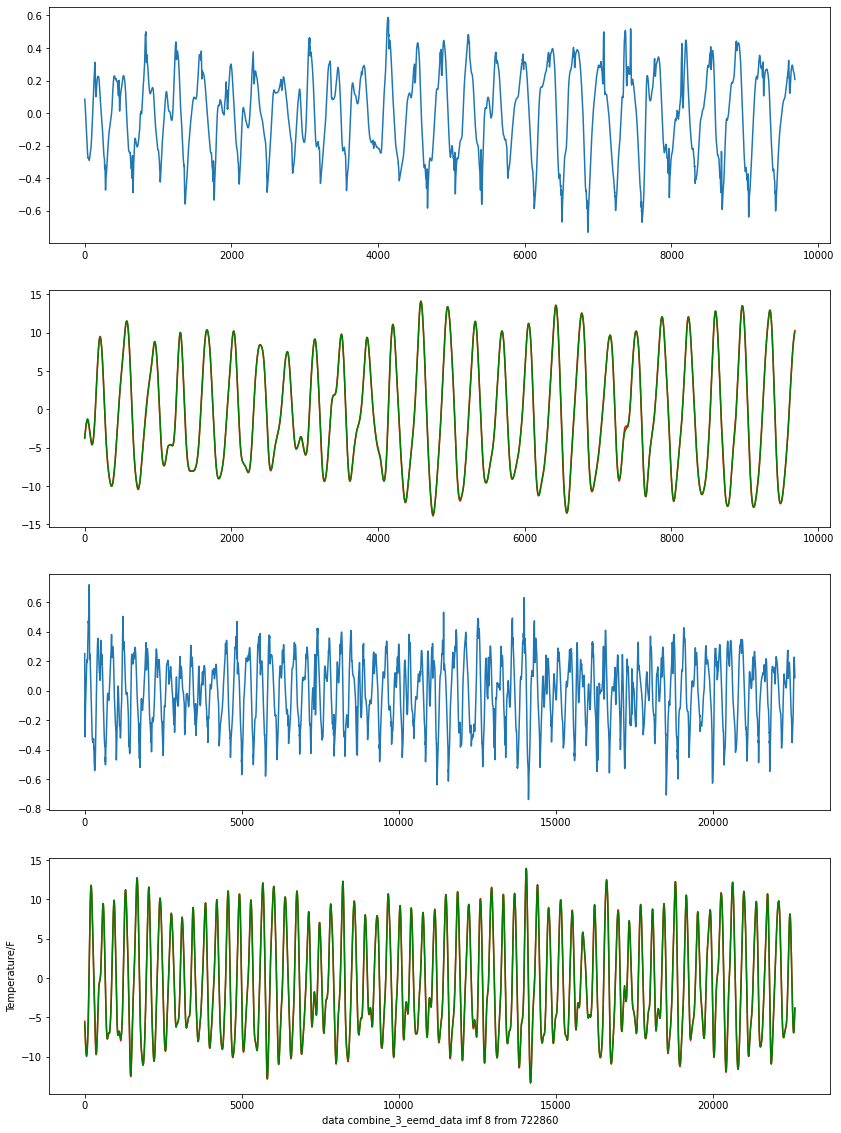

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.5603 - val_loss: 0.0983
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.5570 - val_loss: 0.0967
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.5529 - val_loss: 0.0950ETA: 0s - loss:
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.5469 - val_loss: 0.0933
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.5267 - val_loss: 0.0916
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.5388 - val_loss: 0.0900
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.5477 - val_loss: 0.0886
Epoch 75/200
707/707 [==============================] - 2s 2ms/step - loss: 0.5378 - val_loss: 0.0871
Epoch 76/200
707/707 [==============================] - 2s 2ms/step - loss: 0.5171 - val_loss: 0.0859
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.51

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2870 - val_loss: 0.0359
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2953 - val_loss: 0.0356
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2891 - val_loss: 0.0353
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2826 - val_loss: 0.0351
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2959 - val_loss: 0.0348
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2933 - val_loss: 0.0345
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2890 - val_loss: 0.0342
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.2908 - val_loss: 0.0340
Epoch 156/200
707/707 [==============================] - 2s 2ms/step - loss: 0.2862 - val_loss: 0.0337
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

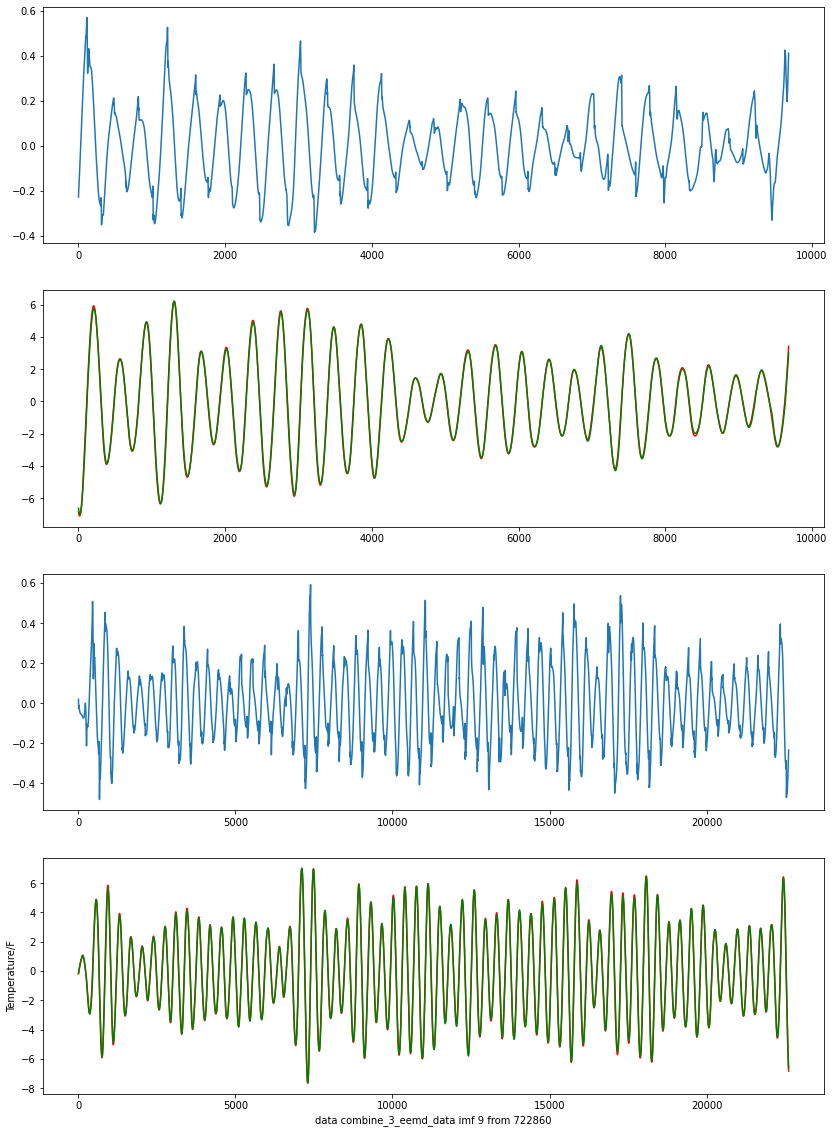

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.1633 - val_loss: 0.0228
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1752 - val_loss: 0.0226
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1662 - val_loss: 0.0223
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1670 - val_loss: 0.0220
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1604 - val_loss: 0.0218
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1585 - val_loss: 0.0216
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1594 - val_loss: 0.0214
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1613 - val_loss: 0.0211
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1594 - val_loss: 0.0209
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1541 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1153 - val_loss: 0.0090
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1181 - val_loss: 0.0089
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1189 - val_loss: 0.0088
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1219 - val_loss: 0.0087
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1204 - val_loss: 0.0086
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1173 - val_loss: 0.0085
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1186 - val_loss: 0.0084
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1139 - val_loss: 0.0083
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.1180 - val_loss: 0.0082
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

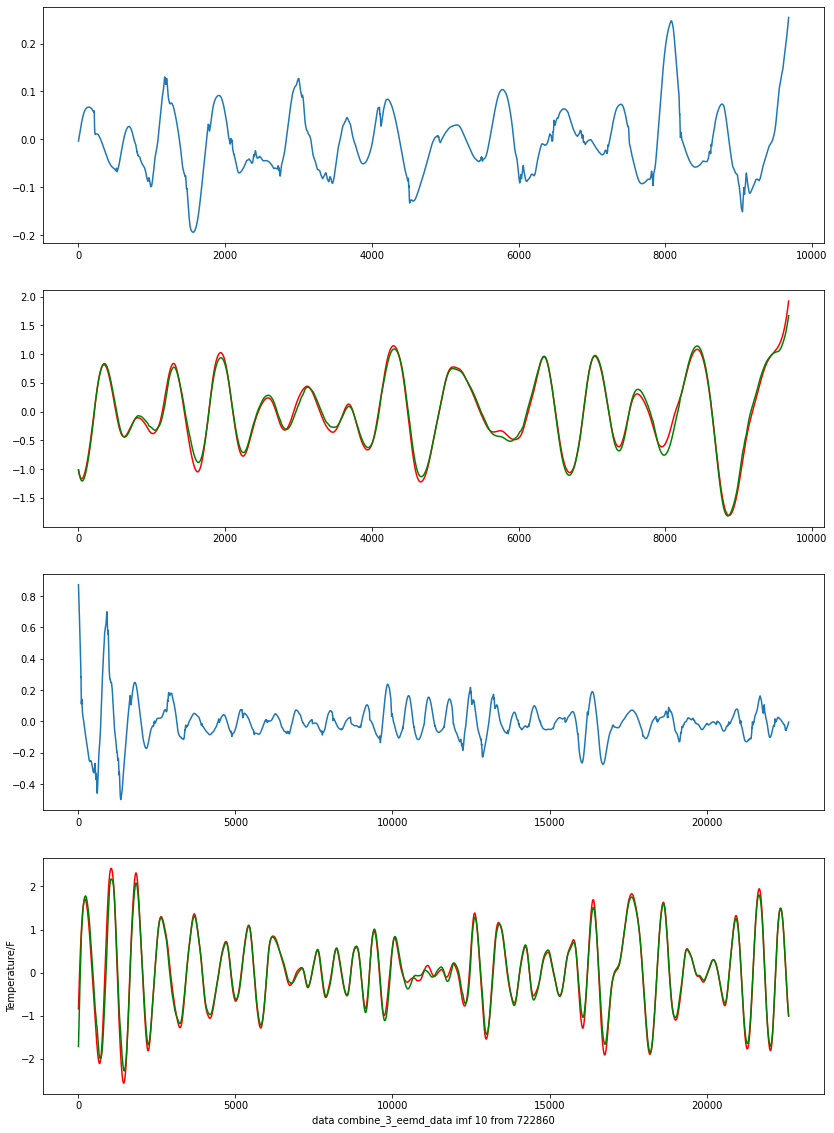

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 0.0613 - val_loss: 0.0061
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0543 - val_loss: 0.0060
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0577 - val_loss: 0.0059
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0605 - val_loss: 0.0058
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0585 - val_loss: 0.0058
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0572 - val_loss: 0.0057
Epoch 74/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0573 - val_loss: 0.0056
Epoch 75/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0542 - val_loss: 0.0055
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0561 - val_loss: 0.0054
Epoch 77/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0558 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0444 - val_loss: 0.0020
Epoch 149/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0443 - val_loss: 0.0020
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0442 - val_loss: 0.0019
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0439 - val_loss: 0.0019
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0443 - val_loss: 0.0019 ETA: 0s - loss:
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0463 - val_loss: 0.0019
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0448 - val_loss: 0.0019
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0435 - val_loss: 0.0018
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0445 - val_loss: 0.0018
Epoch 157/200
707/707 [==============================] - 

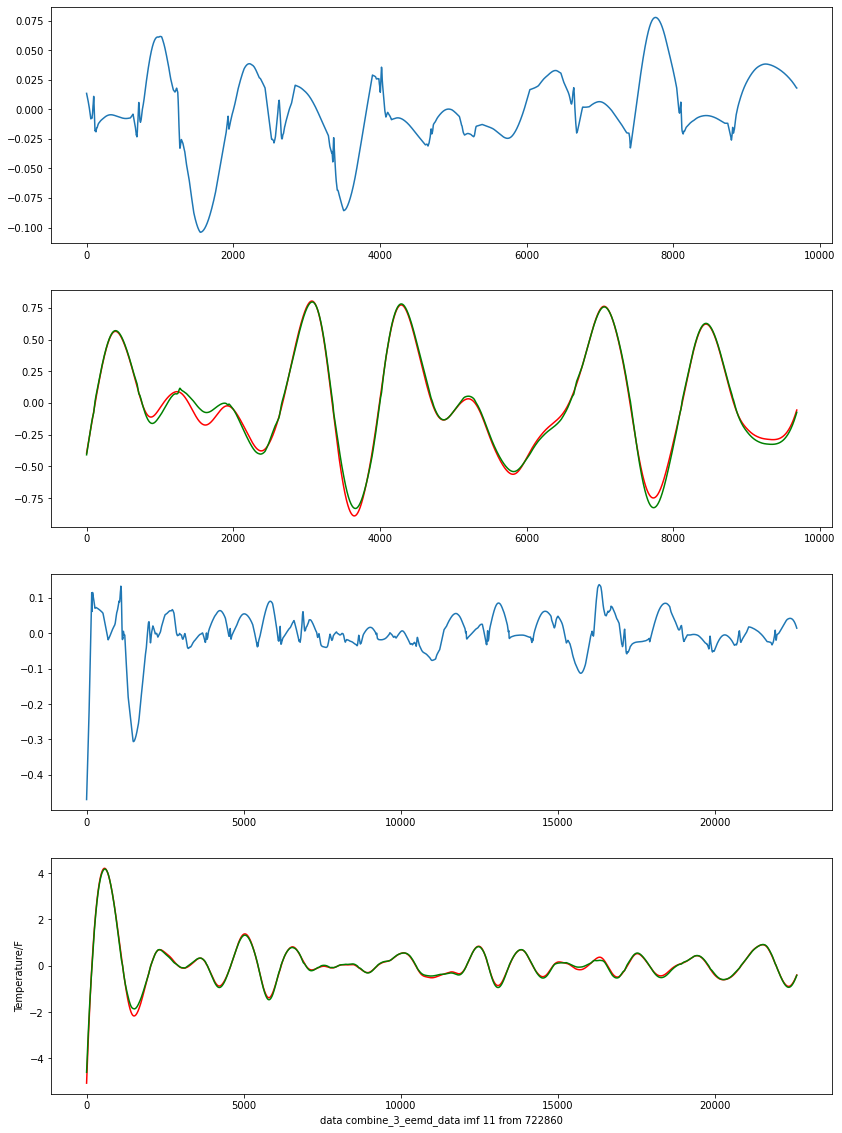

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 2s 2ms/step - loss: 0.0575 - val_loss: 0.0230
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0568 - val_loss: 0.0227
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0574 - val_loss: 0.0225
Epoch 71/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0551 - val_loss: 0.0223
Epoch 72/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0543 - val_loss: 0.0221
Epoch 73/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0565 - val_loss: 0.0218
Epoch 74/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0556 - val_loss: 0.0216
Epoch 75/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0563 - val_loss: 0.0214
Epoch 76/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0562 - val_loss: 0.0212
Epoch 77/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0559 - val_loss: 

707/707 [==============================] - 1s 2ms/step - loss: 0.0426 - val_loss: 0.0124
Epoch 148/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0420 - val_loss: 0.0124
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0435 - val_loss: 0.0123
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0433 - val_loss: 0.0122
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0430 - val_loss: 0.0121
Epoch 152/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0440 - val_loss: 0.0120
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0438 - val_loss: 0.0119
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 0.0438 - val_loss: 0.0119
Epoch 155/200
707/707 [==============================] - 2s 2ms/step - loss: 0.0433 - val_loss: 0.0118 - ETA: 0s - loss: 0.0
Epoch 156/200
707/707 [==============================] - 1s 2ms/s

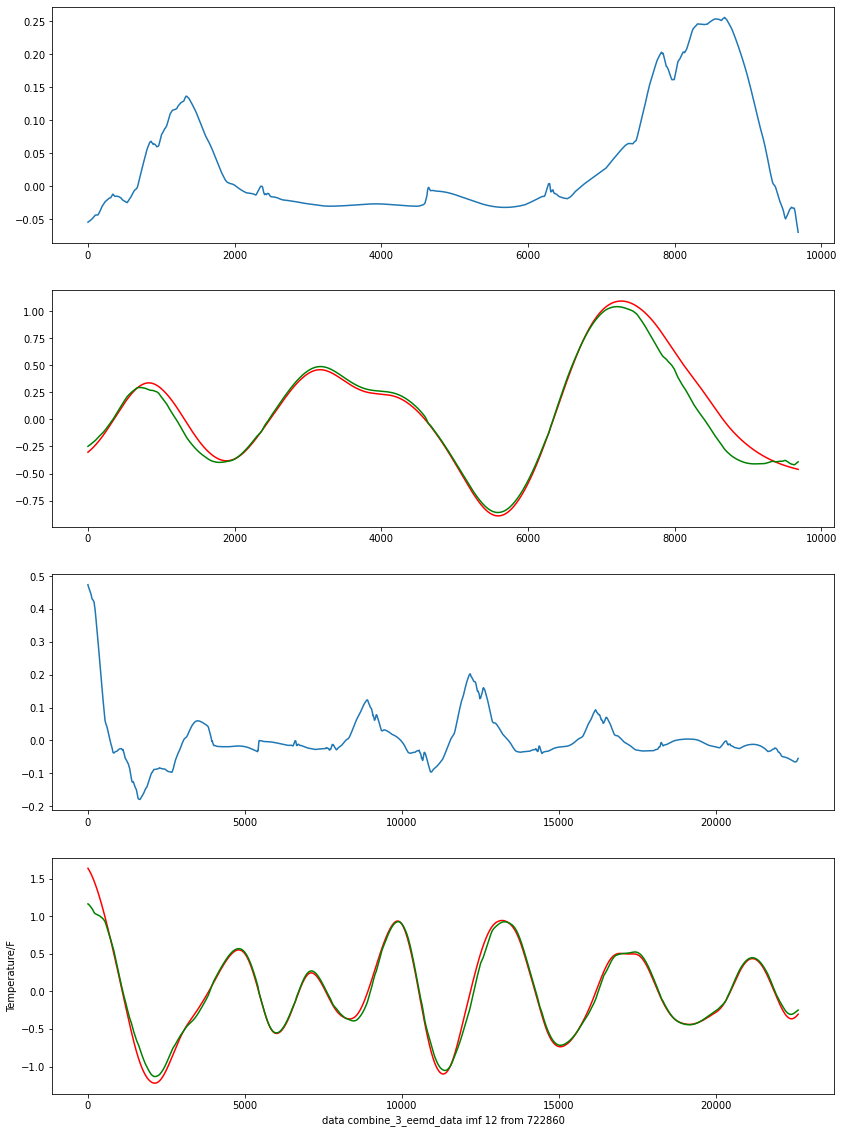

-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
______________________________________________________

707/707 [==============================] - 1s 2ms/step - loss: 7.9815 - val_loss: 0.0224
Epoch 69/200
707/707 [==============================] - 1s 2ms/step - loss: 7.7579 - val_loss: 0.3664
Epoch 70/200
707/707 [==============================] - 1s 2ms/step - loss: 7.9284 - val_loss: 0.7381
Epoch 71/200
707/707 [==============================] - 2s 2ms/step - loss: 7.8309 - val_loss: 0.1704
Epoch 72/200
707/707 [==============================] - 2s 2ms/step - loss: 7.7658 - val_loss: 0.0238
Epoch 73/200
707/707 [==============================] - 2s 2ms/step - loss: 8.0116 - val_loss: 0.0201
Epoch 74/200
707/707 [==============================] - 2s 3ms/step - loss: 7.8070 - val_loss: 0.1263
Epoch 75/200
707/707 [==============================] - 2s 3ms/step - loss: 7.8978 - val_loss: 0.0366
Epoch 76/200
707/707 [==============================] - 2s 2ms/step - loss: 8.0558 - val_loss: 0.2566
Epoch 77/200
707/707 [==============================] - 2s 2ms/step - loss: 7.9958 - val_loss: 

Epoch 148/200
707/707 [==============================] - 1s 2ms/step - loss: 8.0722 - val_loss: 0.0048
Epoch 149/200
707/707 [==============================] - 1s 2ms/step - loss: 7.9072 - val_loss: 0.0348
Epoch 150/200
707/707 [==============================] - 1s 2ms/step - loss: 7.7376 - val_loss: 0.0143
Epoch 151/200
707/707 [==============================] - 1s 2ms/step - loss: 7.7506 - val_loss: 0.1252
Epoch 152/200
707/707 [==============================] - 1s 2ms/step - loss: 7.8320 - val_loss: 0.1923
Epoch 153/200
707/707 [==============================] - 1s 2ms/step - loss: 7.8976 - val_loss: 0.0503
Epoch 154/200
707/707 [==============================] - 1s 2ms/step - loss: 7.7801 - val_loss: 0.0592
Epoch 155/200
707/707 [==============================] - 1s 2ms/step - loss: 7.7897 - val_loss: 0.0068
Epoch 156/200
707/707 [==============================] - 1s 2ms/step - loss: 7.9393 - val_loss: 0.2926
Epoch 157/200
707/707 [==============================] - 1s 2ms/step - lo

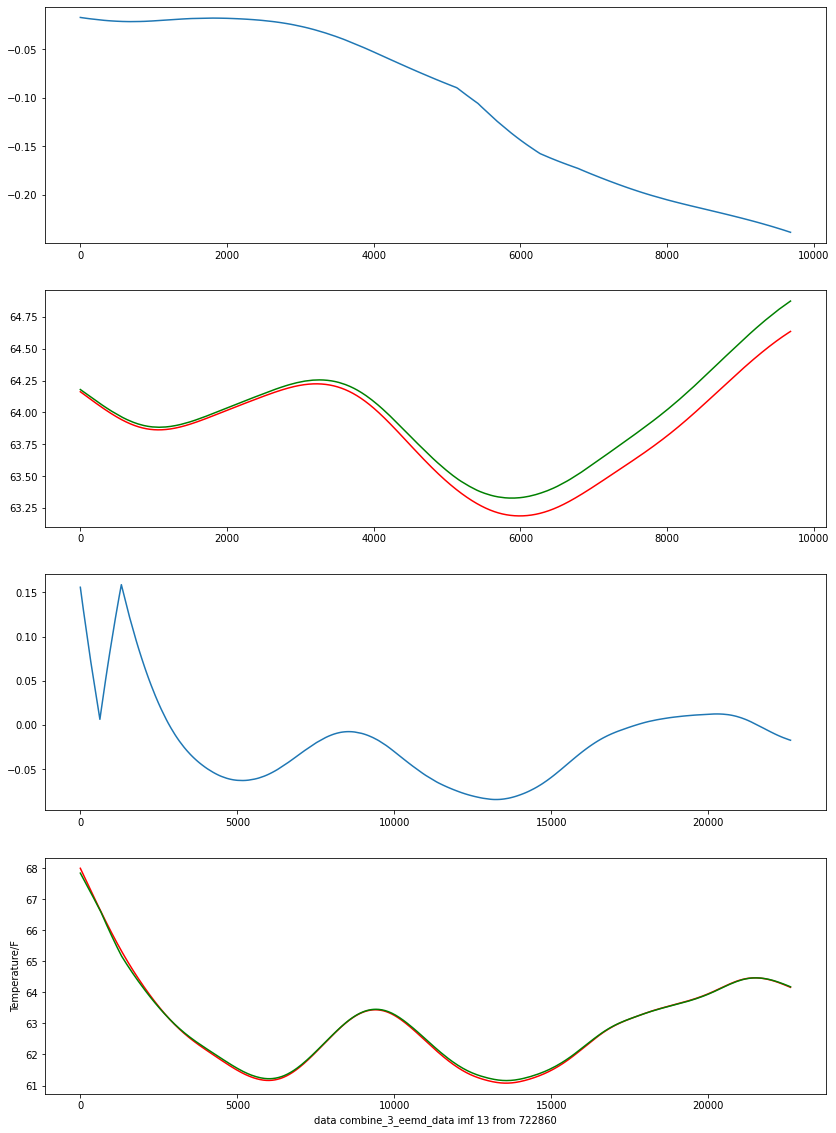

-------------------------------------------------------------------


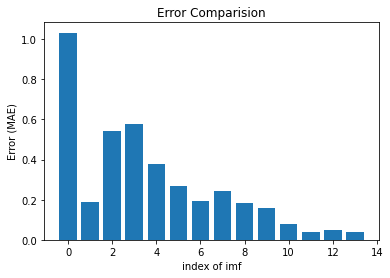

In [9]:
name = "combine_3_eemd_data"
error = []
train_set_avg = np.load(f"./npy/eemd_avg_%s.npy"%SITE_CODE)
train_set_min = np.load(f"./npy/eemd_min_%s.npy"%SITE_CODE)
train_set_max = np.load(f"./npy/eemd_max_%s.npy"%SITE_CODE)

verify = train_set_max[0] == train_set_avg[0]
assert not verify[np.argmin(verify)], data_have_same

tf.keras.backend.clear_session()

for i in range(len(train_set_avg)):
    train_sub_avg = train_set_avg[i]
    train_sub_min = train_set_min[i]
    train_sub_max = train_set_max[i]
    
    train_index = int(len(train_set_avg[0])*.7+5/9)
    
    (train_data_avg, train_label), (test_data_avg, test_label) = publicMethod.generate(train_index, train_sub_avg)
    (train_data_min, _), (test_data_min, _) = publicMethod.generate(train_index, train_sub_min)
    (train_data_max, _), (test_data_max, _) = publicMethod.generate(train_index, train_sub_max)

    train_data = np.concatenate([train_data_avg, train_data_min, train_data_max], axis = 1)
    test_data = np.concatenate([test_data_avg, test_data_min, test_data_max], axis = 1)
    
    # print(train_data_avg[0] == train_data_min[0], train_set[0])
    
    model = construct_model(train_data, train_label, test_data, test_label)
    
    mse_test = np.sum((model.predict(test_data) - test_label.reshape(-1, 1))**2)/len(test_label)
    mse_train = np.sum((model.predict(train_data) - train_label.reshape(-1, 1))**2)/len(train_label)
    
    fail_safe, index = True, 0
    base_line = np.sum((train_sub_avg[1:] - train_sub_avg[:-1])**2)/(len(train_sub_avg)-1)
    
    """while mse_test >= base_line/(len(train_set_avg)-i+1) and fail_safe:
        print("-------------------------------------------------------------------")
        index += 1
        print(f"\bEpoch:{index}\nMSE\nTRAIN:{mse_train}\tTEST:{mse_test}\nBase_line:{base_line}\tDIFFERENT:{abs(base_line - mse_test)}\nTARGET:{base_line/(len(train_set_avg)-i+1)}\033[0m")
        model = retrain(model, train_data, train_label, test_data, test_label)
        mse_test = np.sum((model.predict(test_data) - test_label.reshape(-1, 1))**2)/len(test_label)
        mse_train = np.sum((model.predict(train_data) - train_label.reshape(-1, 1))**2)/len(train_label)
            
        if index == 10:
            fail_safe = False"""
    
    
    print(f"\bEpoch:{i}\nMSE\nTRAIN:{mse_train}\tTEST:{mse_test}\nBase_line:{base_line}\tDIFFERENT:{abs(base_line - mse_test)}\nTARGET:{base_line/(len(train_set_avg)-i+1)}\033[0m")
    plot(model.predict(test_data), test_label, model.predict(train_data), train_label, i, name)
    error.append(np.sum(abs(model.predict(train_data) - train_label.reshape(-1, 1)))/len(train_label))
        
    #tf.saved_model.save(model, f'{SAVE_PATH}/{SITE_CODE}_{name}_imf{i}.params')
    model.save_weights(f'{SAVE_PATH}/{SITE_CODE}_{name}_imf{i}.params')
    print("-------------------------------------------------------------------")
    tf.keras.backend.clear_session()

plt.bar(range(len(error)), error)
plt.xlabel("index of imf")
plt.ylabel("Error (MAE)")
plt.title("Error Comparision")
plt.savefig(f"{SAVE_PATH}/fig/MAE_Error_Compare_{name}_%s.jpg"%SITE_CODE)
plt.show()

In [10]:
# %tensorboard --logdir logs/scalars